<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva (encontrar la vista aérea)  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/carretera.png" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

Librerías básicas de esta notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 2-A

## 2-A.1 Mostrando imagen original

Se selecciona la imagen original

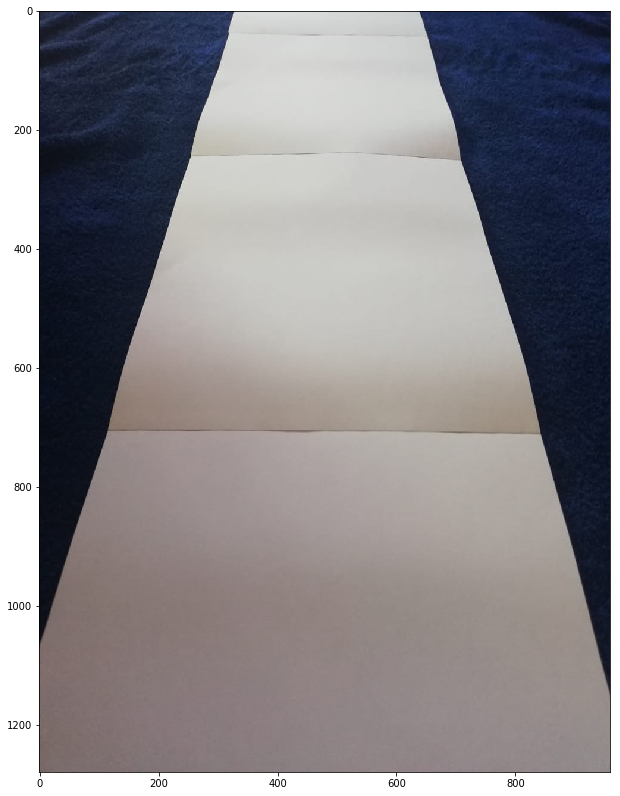

In [2]:
img = cv.imread("figuras/camino.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,14))
plt.imshow(img)
plt.show()

## 2-A.2 Grid

Para una mejor visualización de coordenadas, se imprime un grid

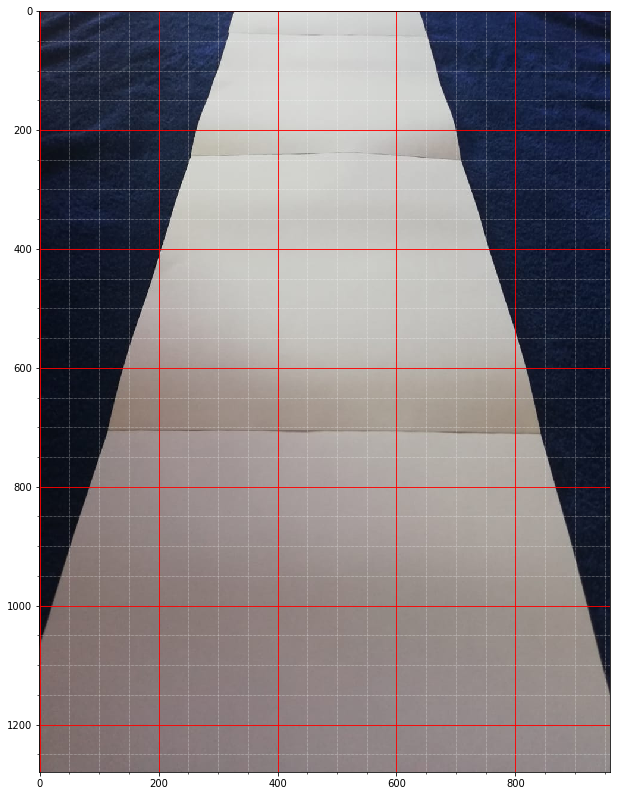

In [3]:
plt.figure(figsize=(14,14))
plt.imshow(img)
plt.minorticks_on()
plt.grid(which="major", linewidth="0.9", linestyle="-", color="red")
plt.grid(which="minor", linewidth="0.5", linestyle=":", color="white")
plt.show()

## 2-A.3 Sección

La perspectiva de la parte inferior puede ser un poco incómoda de procesar debido a que los bordes se cortan por los laterales, por lo tanto solo nos enfocaremos en la parte superior por medio de un corte de sección

Forma de la imagen original:  (1280, 960, 3)


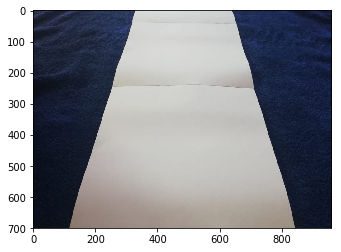

Forma de la sección de imagen:  (700, 960, 3)


In [4]:
print("Forma de la imagen original: ", img.shape)
img_section = img[0:700,0:960]
plt.imshow(img_section)
plt.show()
print("Forma de la sección de imagen: ", img_section.shape)

## 2-A.4 Puntos de perspectiva

Se definen los puntos los cuales serán transformados

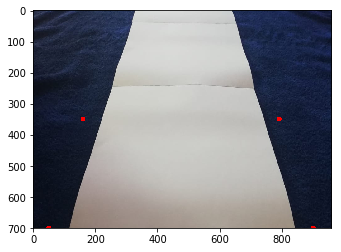

In [5]:
cv.circle(img_section, (160,350), 8, (255,0,0), -1)
cv.circle(img_section, (790,350), 8, (255,0,0), -1)
cv.circle(img_section, (50,700), 8, (255,0,0), -1)
cv.circle(img_section, (900,700), 8, (255,0,0), -1)
plt.imshow(img_section)
plt.show()

## 2-A.5 Aplicando transformación

Con los puntos localizados se realiza una transformación a esta área

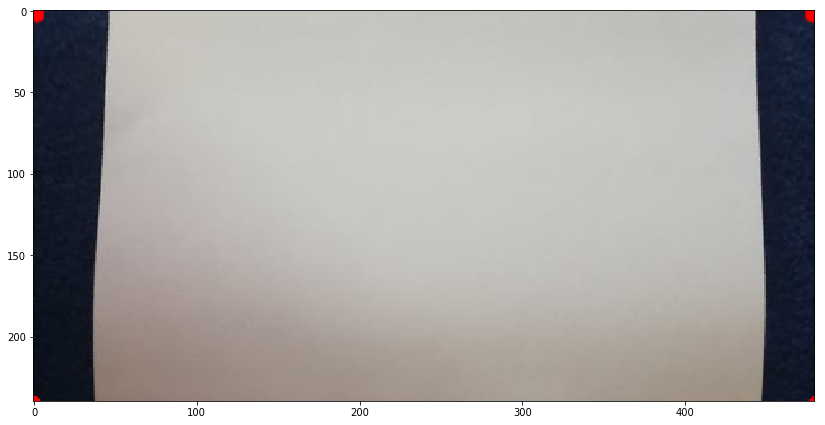

In [6]:
pts1 = np.float32([[160,350],[790,350],[50,700],[900,700]])
pts2 = np.float32([[0,0], [480,0], [0,240],[480,240]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img_section, matrix, (480, 240))
plt.figure(figsize=(14,14))
plt.imshow(img_warp)
plt.show()

## 2-A.6 Todas las operaciones

Aplicando todas las principales operaciones

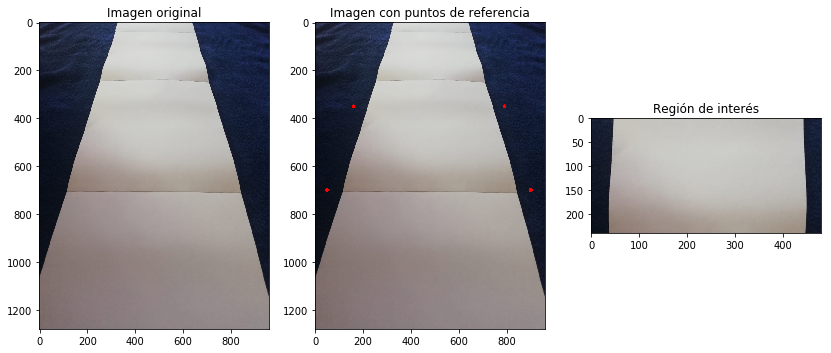

In [7]:
img = cv.imread("figuras/camino.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_circles = cv.imread("figuras/camino.jpg")
img_circles = cv.cvtColor(img_circles, cv.COLOR_BGR2RGB)

cv.circle(img_circles, (160,350), 8, (255,0,0), -1)
cv.circle(img_circles, (790,350), 8, (255,0,0), -1)
cv.circle(img_circles, (50,700), 8, (255,0,0), -1)
cv.circle(img_circles, (900,700), 8, (255,0,0), -1)

pts1 = np.float32([[160,350],[790,350],[50,700],[900,700]])
pts2 = np.float32([[0,0], [480,0], [0,240],[480,240]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (480, 240))

plt.figure(figsize=(14,14))

plt.subplot(1,3,1)
plt.title("Imagen original")
plt.imshow(img)

plt.subplot(1,3,2)
plt.title("Imagen con puntos de referencia")
plt.imshow(img_circles)

plt.subplot(1,3,3)
plt.title("Región de interés")
plt.imshow(img_warp)

plt.show()

# Actividad 2-B

Esta segunda actividad binariza la imagen de la actividad anterior

## 2-B.1 Imagen de partida

Partiendo de la imagen transformada del ejercicio anterior

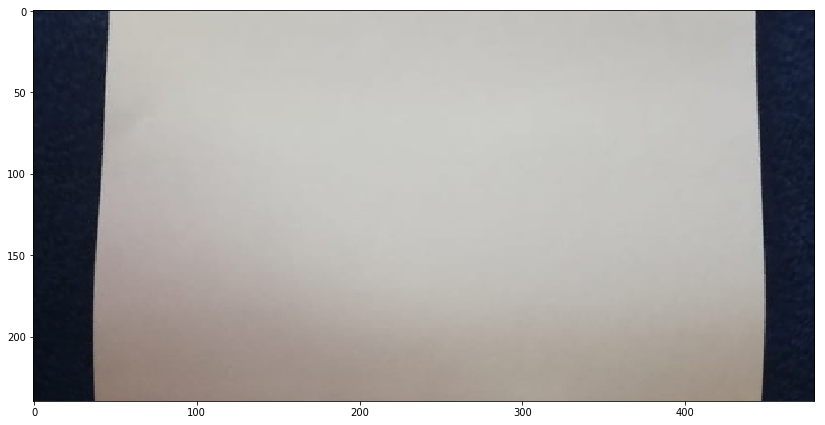

In [8]:
plt.figure(figsize=(14,14))
plt.imshow(img_warp)
plt.show()

## 2-B.2 Escala de grises

Pasando la imagen a escala de grises

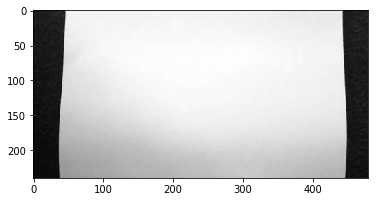

In [9]:
img_gray = cv.cvtColor(img_warp, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()

## 2-B.3 Filtro Gaussiano

Para definir mejor los bordes de la imagen, se aplica una filtro gaussiano

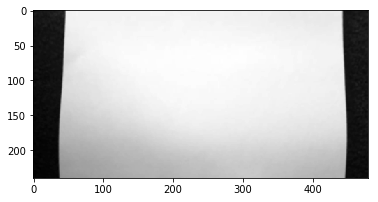

In [10]:
img_gauss = cv.GaussianBlur(img_gray, (3,3), 0)
plt.imshow(img_gauss, cmap="gray")
plt.show()

## 2-B.4 Thresholding

Se binariza la imagen a cierto umbral para indicar dónde hay camino

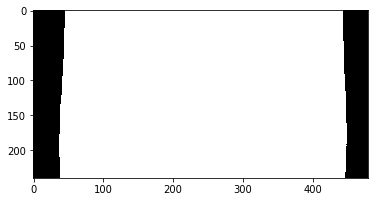

In [11]:
thr, img_thresh = cv.threshold(img_gauss, 100, 255, cv.THRESH_BINARY)
plt.imshow(img_thresh, cmap="gray")
plt.show()

## 2-B.5 Todas las operaciones

Se resumen todas las operaciones y el resultado final

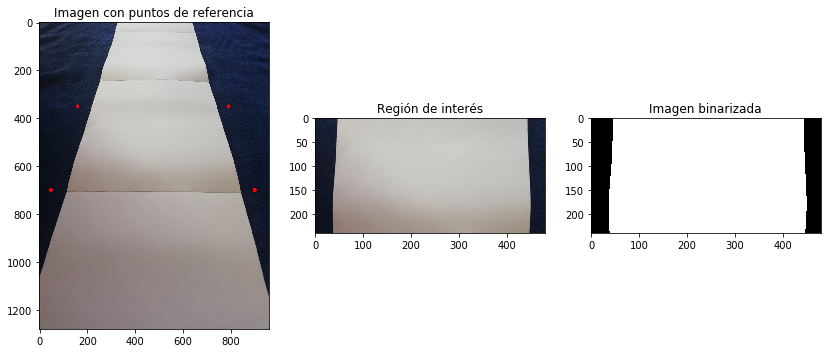

In [12]:
img = cv.imread("figuras/camino.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_circles = cv.imread("figuras/camino.jpg")
img_circles = cv.cvtColor(img_circles, cv.COLOR_BGR2RGB)

cv.circle(img_circles, (160,350), 8, (255,0,0), -1)
cv.circle(img_circles, (790,350), 8, (255,0,0), -1)
cv.circle(img_circles, (50,700), 8, (255,0,0), -1)
cv.circle(img_circles, (900,700), 8, (255,0,0), -1)

pts1 = np.float32([[160,350],[790,350],[50,700],[900,700]])
pts2 = np.float32([[0,0], [480,0], [0,240],[480,240]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (480, 240))

img_gray = cv.cvtColor(img_warp, cv.COLOR_RGB2GRAY)
img_gauss = cv.GaussianBlur(img_gray, (3,3), 0)
thresh, img_thresh = cv.threshold(img_gauss, 100, 255, cv.THRESH_BINARY)

plt.figure(figsize=(14,14))

plt.subplot(1,3,1)
plt.title("Imagen con puntos de referencia")
plt.imshow(img_circles)

plt.subplot(1,3,2)
plt.title("Región de interés")
plt.imshow(img_warp)

plt.subplot(1,3,3)
plt.title("Imagen binarizada")
plt.imshow(img_thresh, cmap="gray")

plt.show()